In [1]:
1+1

2

In [1]:
import os
from dotenv import load_dotenv
from typing import TypedDict, List
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_openai import ChatOpenAI
from langchain.agents import Tool
from langgraph.prebuilt import create_react_agent
from langgraph.graph import StateGraph, END

load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")


def add_two(x:str) -> str:
    try:
        return str(float(x)+2)
    except Exception:
        return ValueError("숫자만 입력 가능합니다.")

def population_lookup(city:str) -> str:
    city = city.strip().lower()
    data = {
        "서울":"900만",
        "부산":"300만",
    }
    return data.get(city.strip().lower(), f"{city}의 인구 정보를 못 찾았다.")

class AgentState(TypedDict):
    messages: List[BaseMessage]

tools = [
    Tool(name="AddTwo", func=add_two, description="숫자 입력 시"),
    Tool(name="PopulationLookup", func=population_lookup, description="도시 인구 조회"),
]

llm = ChatOpenAI(
    model = "gpt-4o-mini",
    temperature=0,
    verbose=True,
)

react_agent = create_react_agent(
    model=llm,
    tools=tools,
    debug=True,
)

graph = StateGraph(AgentState)
graph.add_node("agent", react_agent)
graph.set_entry_point("agent")
graph.add_edge("agent", END)

app = graph.compile()


    
response = app.invoke({
    "messages": [
        HumanMessage(content="서울")
    ]
})

for m in response["messages"]:
    print(m.__class__.__name__, ":", getattr(m, "content", repr(m)))

[values] {'messages': [HumanMessage(content='서울', additional_kwargs={}, response_metadata={}, id='09dad994-3896-425a-8078-560fd8097ad7')]}
[updates] {'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_7cIWifobw4mFWwZZ9AqNzkok', 'function': {'arguments': '{"__arg1":"서울"}', 'name': 'PopulationLookup'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 76, 'total_tokens': 93, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_62a23a81ef', 'id': 'chatcmpl-BqdOuscYHzUzI1VWWzmppZrneGwAn', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--c2dd3383-7b25-4a2f-b571-307f6fd7d78c-0', tool_calls=[{'name': 'PopulationLookup', 'args': {'__arg

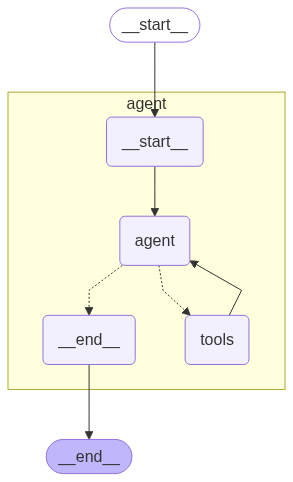

In [2]:
from IPython.display import Image, display

try:
    # 잘못된 코드
    # display(Image(graph.get_graph().draw_mermaid_png()))

    # 올바른 코드
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except Exception as e:
    print(f"Error type: {type(e).__name__}")
    print(f"Error message: {e}")